Matplotlib is building the font cache; this may take a moment.


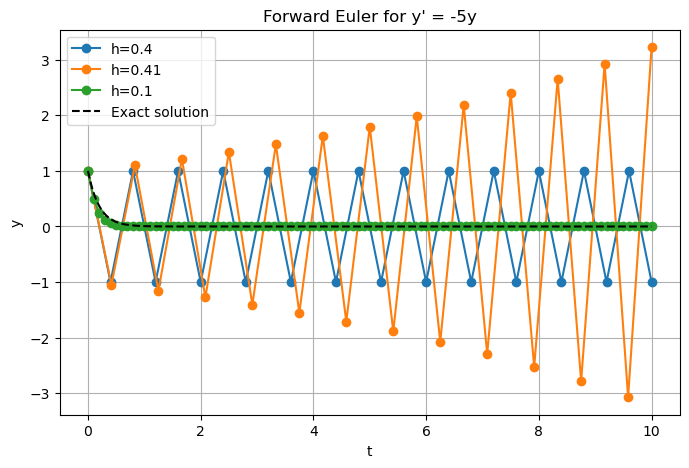

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(f, y0, t0, tf, h):
    N = int((tf - t0) / h)
    t = np.linspace(t0, tf, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * f(t[n], y[n])
    return t, y

# 定義問題
f = lambda t, y: -5 * y
y0 = 1
t0, tf = 0, 10
hs = [0.4, 0.41, 0.1]
exact = lambda t: np.exp(-5 * t)

plt.figure(figsize=(8,5))
for h in hs:
    t, y = forward_euler(f, y0, t0, tf, h)
    plt.plot(t, y, 'o-', label=f'h={h}')

# 精確解
t_exact = np.linspace(0, 10, 500)
plt.plot(t_exact, exact(t_exact), 'k--', label='Exact solution')

plt.title("Forward Euler for y' = -5y")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Forward Euler 公式：
𝑦𝑛+1=𝑦𝑛+ℎ𝑓(𝑡𝑛,𝑦𝑛)
當ℎ太大時 (例如h=0.4)，解會產生震盪甚至發散；

因為 Forward Euler 的穩定條件是∣1+hλ∣<1，
這裡 λ=−5，所以 
h<0.4 才穩定。
h=0.41 會發散，
h=0.4 邊界不穩定，
h=0.1 則穩定收斂。

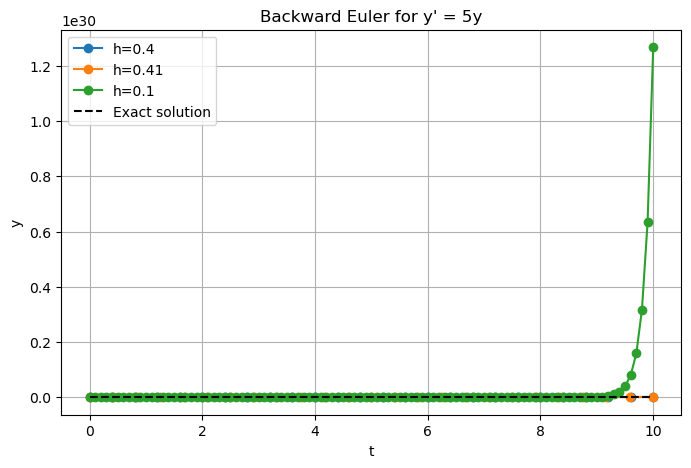

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def backward_euler(f, y0, t0, tf, h):
    N = int((tf - t0) / h)
    t = np.linspace(t0, tf, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for n in range(N):
        # y_{n+1} = y_n + h * 5 * y_{n+1}  => y_{n+1} = y_n / (1 - 5h)
        y[n+1] = y[n] / (1 - 5 * h)
    return t, y

# 定義問題
f = lambda t, y: 5 * y
y0 = 1
t0, tf = 0, 10
hs = [0.4, 0.41, 0.1]
exact = lambda t: np.exp(5 * t)

plt.figure(figsize=(8,5))
for h in hs:
    t, y = backward_euler(f, y0, t0, tf, h)
    plt.plot(t, y, 'o-', label=f'h={h}')

# 精確解
t_exact = np.linspace(0, 10, 500)
plt.plot(t_exact, exact(t_exact), 'k--', label='Exact solution')

plt.title("Backward Euler for y' = 5y")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Backward Euler 公式： 𝑦𝑛+1=𝑦𝑛+ℎ𝑓(𝑡𝑛+1,𝑦𝑛+1)
對線性方程 𝑦′=5𝑦，可解析為 𝑦𝑛+1=𝑦𝑛/(1−5ℎ)
雖然這裡 𝑦′=5𝑦是發散的問題，但 Backward Euler 是穩定的， 
所以用在收斂問題（如𝑦′=−5𝑦）會非常穩定，即使ℎ大也不會發散。

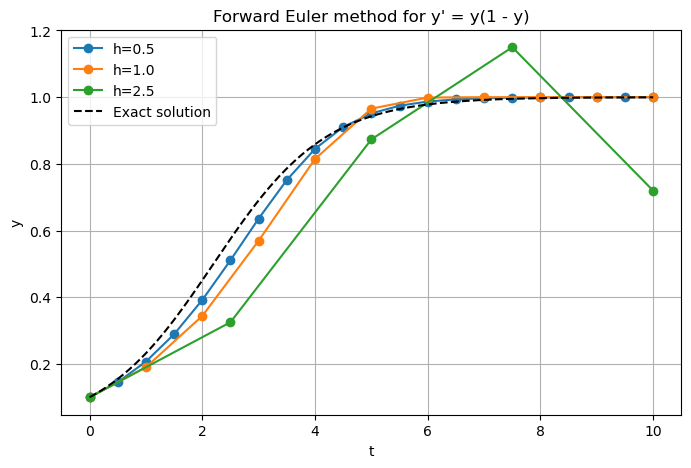

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(f, y0, t0, t_end, h):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros_like(t)
    y[0] = y0
    for n in range(len(t) - 1):
        y[n+1] = y[n] + h * f(y[n])
    return t, y

# logistic function
f = lambda y: y * (1 - y)

y0 = 0.1
t0, t_end = 0, 10
h_values = [0.5, 1.0, 2.5]  # 測試不同步長

plt.figure(figsize=(8,5))
for h in h_values:
    t, y = forward_euler(f, y0, t0, t_end, h)
    plt.plot(t, y, 'o-', label=f"h={h}")

# 精確解（供比較）
t_exact = np.linspace(0, 10, 200)
y_exact = 1 / (1 + (1/y0 - 1)*np.exp(-t_exact))
plt.plot(t_exact, y_exact, 'k--', label='Exact solution')

plt.xlabel("t")
plt.ylabel("y")
plt.title("Forward Euler method for y' = y(1 - y)")
plt.legend()
plt.grid(True)
plt.show()

在平衡點 𝑦∗=1附近線性化：𝑦′=𝑓(𝑦)=𝑦(1−𝑦)⇒𝑓′(𝑦)=1−2𝑦
在𝑦=1時：𝑓′(1)=−1
Forward Euler 對線性系統 𝑦′=𝜆𝑦的穩定條件是：|1+hλ∣<1
代入λ=−1：∣1−h∣<1
得到：0<ℎ<2